Using GPU ror running billions of records. It also saves a lot of processing time instead of running on local systems.

In [322]:
!nvidia-smi

Wed Oct 14 18:51:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [323]:
import os
print(os.getcwd())
print(os.listdir())

/content/gdrive/My Drive
['SAS', 'DSP 12', 'Colab Notebooks', 'Untitled', 'Leave Policy Jan,2020.odt', 'khushbu biodata updated.docx.docx', 'pics', 'DSPResume11.docx', 'DSPResume13.docx', 'resume', 'khushbu_rajput_resume.docx', 'KhushbuRajputInternResume.doc', 'July18.pdf', 'July18.docx', 'Untitled spreadsheet.gsheet', 'khushbu_rajput_ (1).docx', 'khushbu_rajput_.docx', 'KhushbuEvolentResume.docx', 'company database.gsheet', 'BeerDataScienceProject.csv', 'evhtest.ipynb']


In [324]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [325]:
base_dir = '/content/gdrive/My Drive'
os.chdir(base_dir)
print(os.getcwd())

/content/gdrive/My Drive


In [326]:
#Import Dependencies

import sys
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [327]:
#Load the dataset of beer data, if we want to run from local system, mention the path as "C:\\Users\\DELL\\Desktop\\assignmentfoldername\\BeerDataScienceProject.csv",encoding="ISO-8859-1"
import pandas as pd
#Import Beer Review Data
beer_data=pd.read_csv("/content/gdrive/My Drive/BeerDataScienceProject.csv",encoding="ISO-8859-1")

#Preview the data
beer_data.head(10)

beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0       5.0        47986          10325            Sausa Weizen   
1       6.2        48213          10325                Red Moon   
2       6.5        48215          10325  Black Horse Black Beer   
3       5.0        47969          10325              Sausa Pils   
4       7.7        64883           1075           Cauldron DIPA   
5       4.7        52159           1075     Caldera Ginger Beer   
6       4.7        52159           1075     Caldera Ginger Beer   
7       4.7        52159           1075     Caldera Ginger Beer   
8       4.7        52159           1075     Caldera Ginger Beer   
9       4.7        52159           1075     Caldera Ginger Beer   

                       beer_style  review_appearance  review_palette  \
0                      Hefeweizen                2.5             2.0   
1              English Strong Ale                3.0             2.5   
2          Foreign / Export Stout                3.0             2.5   
3                 German Pilsener                3.5             3.0   
4  American Double / Imperial IPA                4.0             4.5   
5            Herbed / Spiced Beer                3.5             3.5   
6            Herbed / Spiced Beer                3.5             3.5   
7            Herbed / Spiced Beer                3.5             2.5   
8            Herbed / Spiced Beer                3.5             3.0   
9            Herbed / Spiced Beer                5.0             3.5   

   review_overall  review_taste review_profileName  review_aroma  \
0             1.5           1.5            stcules           1.5   
1             3.0           3.0            stcules           3.0   
2             3.0           3.0            stcules           3.0   
3             3.0           2.5            stcules           3.0   
4             4.0           4.0     johnmichaelsen           4.5   
5             3.0           3.0            oline73           3.5   
6             3.5           4.0          Reidrover           4.0   
7             3.0           2.0       alpinebryant           3.5   
8             4.0           3.5      LordAdmNelson           4.0   
9             4.5           4.0       augustgarage           4.0   

                                         review_text  review_time  
0  A lot of foam. But a lot. In the smell some ba...   1234817823  
1  Dark red color, light beige foam, average. In ...   1235915097  
2  Almost totally black. Beige foam, quite compac...   1235916604  
3  Golden yellow color. White, compact foam, quit...   1234725145  
4  According to the website, the style for the Ca...   1293735206  
5  Poured from the bottle into a Chimay goblet. A...   1325524659  
6  22 oz bottle from "Lifesource" Salem. $3.95 Ni...   1318991115  
7  Bottle says "Malt beverage brewed with Ginger ...   1306276018  
8  I'm not sure why I picked this up... I like gi...   1290454503  
9  Poured from a 22oz bomber into my Drie Fontein...   1285632924

In [ ]:

#Preview the data
print("DATASET SHAPE: ",beer_data.shape) #DATASET SHAPE:  (528870, 13)




# QUESTION 5. which beer style is favourite based on reviews 
# First we shall group the beer styles and sort it by top overall reviews of beer styles. Then plot the graph.

In [ ]:
#1)prints review count group by  beer style 
beer_style_count = beer_data.groupby(['beer_style']).review_overall.count().sort_values(ascending=False).reset_index().rename(columns={'review_overall': 'total_count'})
data = pd.DataFrame(beer_style_count)
print(data) #beer_style  total_count

                           beer_style  total_count
0                        American IPA        43369
1      American Double / Imperial IPA        26106
2    American Double / Imperial Stout        23354
3             American Pale Ale (APA)        20520
4            American Amber / Red Ale        18731
..                                ...          ...
99                              Sahti          139
100                             Kvass          118
101                              Gose           90
102                          Happoshu           55
103                              Faro           53

[104 rows x 2 columns]


In [332]:
#2)prints average of reviews groupby beer style
style_means = beer_data.groupby(['beer_style']).review_overall.mean().sort_values(ascending = False).reset_index().rename(columns={'review_overall': 'review_avg'})
beer_style_means_df = pd.DataFrame(style_means)
print(beer_style_means_df)#  beer_style  review_avg


                           beer_style  review_avg
0                              Gueuze    4.140952
1                  Berliner Weissbier    4.133976
2    American Double / Imperial Stout    4.100518
3                       Oatmeal Stout    4.080768
4                             Eisbock    4.079487
..                                ...         ...
99                        Light Lager    2.913462
100                          Happoshu    2.818182
101                 Euro Strong Lager    2.817995
102              American Malt Liquor    2.722183
103                  Low Alcohol Beer    2.602740

[104 rows x 2 columns]


In [333]:
 #Merge the two dataframes for drawing the plot
 dataset = pd.merge(beer_style_means_df, beer_style_count, on='beer_style', how='outer')
 print(dataset) #beer_style  review_avg  review_count

                           beer_style  review_avg  total_count
0                              Gueuze    4.140952         1575
1                  Berliner Weissbier    4.133976          933
2    American Double / Imperial Stout    4.100518        23354
3                       Oatmeal Stout    4.080768         6723
4                             Eisbock    4.079487          195
..                                ...         ...          ...
99                        Light Lager    2.913462         4472
100                          Happoshu    2.818182           55
101                 Euro Strong Lager    2.817995          728
102              American Malt Liquor    2.722183         1411
103                  Low Alcohol Beer    2.602740          219

[104 rows x 3 columns]


Text(0.5, 1.0, 'Beer style is favourite based on user reviews ')

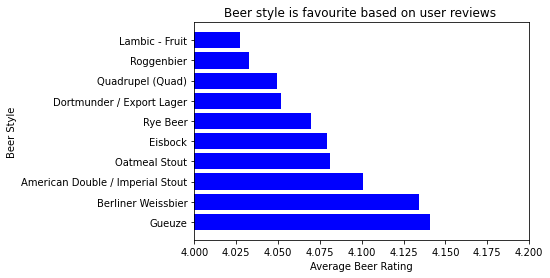

In [334]:
#QUESTION 5.
#Which beer style is favourite based on reviews 
#Plot the top rated beer styles
import matplotlib.pyplot as plt
plt.barh(dataset['beer_style'].head(10),dataset['review_avg'].head(10),align='center', color="b")
plt.ylabel("Beer Style")
plt.xlim(4.0,4.2)
plt.xlabel("Average Beer Rating")
plt.title("Beer style is favourite based on user reviews ")

# QUESTION 4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
1)BEERS WITH TOP TASTE,AROMA & OVERALL RATING 
2)BEERS WITH TOP APPEARANCE 
3)BEERS WITH HIGHEST ABV RATE AND OVERALL REVIEW

In [335]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 15)
print("-------------------BEERS WITH TOP TASTE,AROMA & OVERALL RATING  ---------------------------")
dataset = beer_data.sort_values(['review_taste','review_aroma'],ascending=(False,False))
data = dataset['beer_name'].loc[(dataset['review_taste'] == 5) & (dataset['review_aroma'] == 5) & (dataset['review_overall'] == 5)].head(3)
print(data)




-------------------BEERS WITH TOP TASTE,AROMA & OVERALL RATING  ---------------------------
212             Caldera Pale Ale
295    Old Growth Imperial Stout
433                  Caldera IPA
Name: beer_name, dtype: object


In [338]:
import matplotlib.pyplot as plt
print("-------------------BEERS WITH TOP APPEARANCE ---------------------------")
dataset = beer_data.groupby(['beer_name']).review_appearance.mean().sort_values(ascending = False).reset_index().head(3) 
print(dataset)

-------------------BEERS WITH TOP APPEARANCE ---------------------------
              beer_name  review_appearance
0           Hops Bandit                5.0
1         Minoh Red Ale                5.0
2  La Madragore Eisbock                5.0


In [339]:
import matplotlib.pyplot as plt
print("-------------BEERS WITH HIGHEST ABV RATE AND OVERALL REVIEW -----------")

dataset = beer_data.nlargest(5,['beer_ABV','review_overall'])
dataset = dataset['beer_name'].unique()
print(dataset)

-------------BEERS WITH HIGHEST ABV RATE AND OVERALL REVIEW -----------
['Schorschbräu Schorschbock 57%' 'Schorschbräu Schorschbock 43%'
 'Schorschbräu Schorschbock 40%']


#QUESTION 1.	Rank top 3 Breweries which produce the strongest beers? 
First I selected those beer_style that are strong. Then select the beer_brewerId's those overall and taste review is the highest and then
Take the count of those top 3 brewerId's that produce the strongest beers.

In [340]:

print("---------------Top 3 Breweries which provides Strongest Beers--------------------\n")
strong_beers = beer_data[beer_data['beer_style'].str.contains('Strong')]
strong_beers_count = strong_beers['beer_brewerId'].loc[(beer_data['review_overall'] == 5) & (beer_data['review_taste'] == 5)].reset_index()

strong_beers_count = strong_beers_count.groupby(['beer_brewerId']).count()
strong_beers_count = strong_beers_count.sort_values(['index'],ascending=False).head(3)
print(strong_beers_count)

---------------Top 3 Breweries which provides Strongest Beers--------------------

               index
beer_brewerId       
22               193
215              129
681               70


## #QUESTION 3.	 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [343]:
#Import Beer Data, if we want to run from local system, mention the path as "C:\\Users\\DELL\\Desktop\\assignmentfoldername\\BeerDataScienceProject.csv",encoding="ISO-8859-1"
beer_data=pd.read_csv("/content/gdrive/My Drive/BeerDataScienceProject.csv",encoding="ISO-8859-1")

#Drop null/nan values
beer_data = beer_data.dropna()


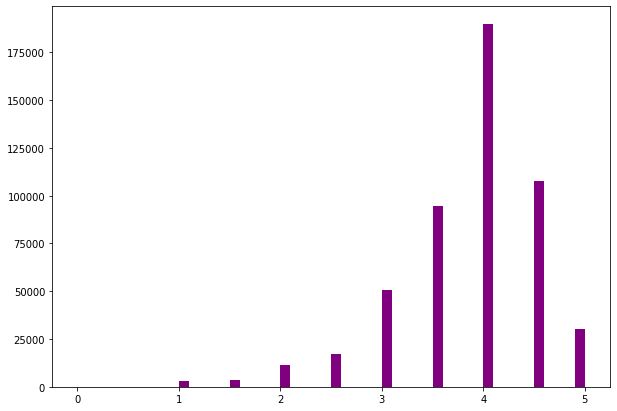

In [345]:
# Creating histogram of overall review
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(beer_data['review_overall'], bins = 50,label='overall',color='purple') 
# Show plot 
plt.show()

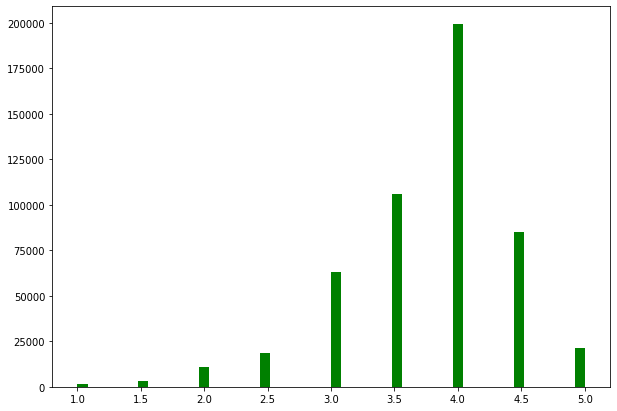

In [347]:
# Creating histogram of review_taste
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(beer_data['review_taste'], bins = 50,label='taste',color='green')
# Show plot 
plt.show()


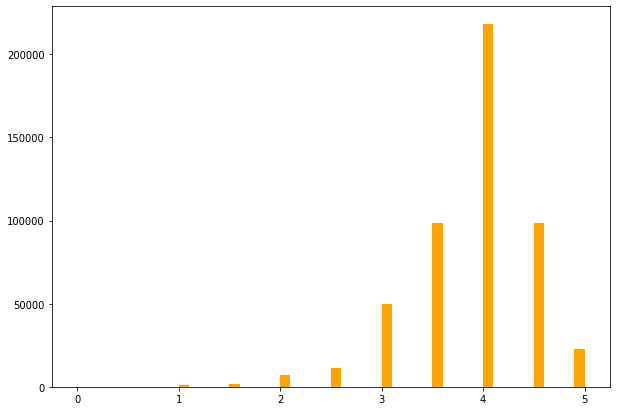

In [348]:
# Creating histogram of review_appearance
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(beer_data['review_appearance'],bins = 50,label='appearance',color='orange')
# Show plot 
plt.show()


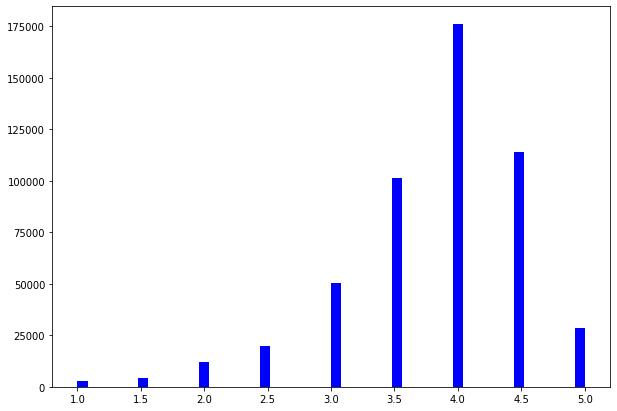

In [349]:
# Creating histogram of review_aroma
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(beer_data['review_aroma'], bins = 50,label='aroma',color='blue')
# Show plot 
plt.show()


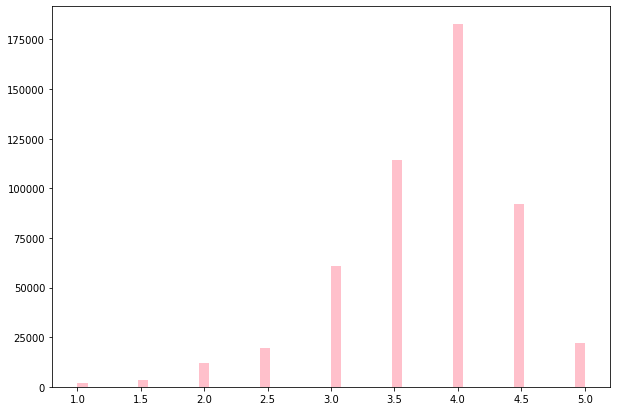

In [350]:
# Creating histogram of review_palette
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(beer_data['review_palette'], bins = 50,label='palette',color='pink')
# Show plot 
plt.show()

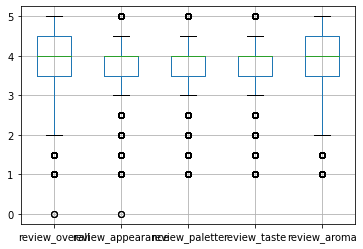

In [351]:
# Plot a boxplot of all reviews
beer_data.boxplot(column = ['review_overall','review_appearance','review_palette','review_taste','review_aroma'],)

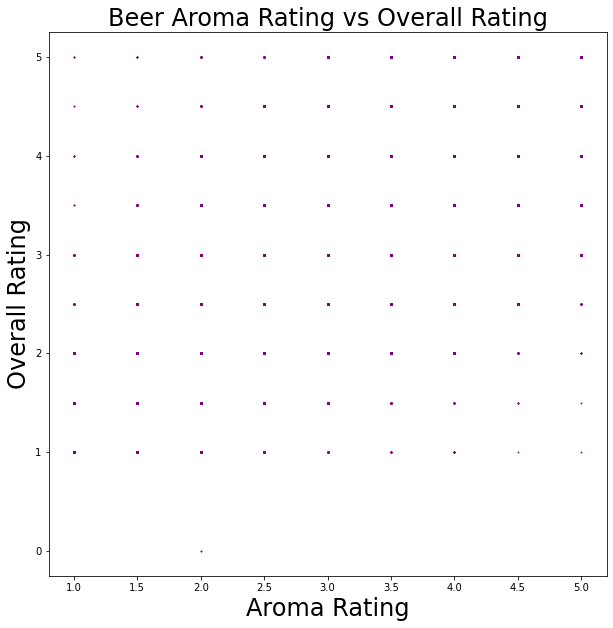

In [352]:
#Drawing scatter plot of aroma vs overall rating
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Beer Aroma Rating vs Overall Rating', fontsize=24)
plt.xlabel('Aroma Rating', fontsize=24)
plt.ylabel('Overall Rating', fontsize=24)
plt.scatter(beer_data['review_aroma'], beer_data['review_overall'], s=.5, alpha=.7, color='purple')
plt.show()

In [354]:
# Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette? 
# Check by performing linear regression of each review wrt overall_review as target variable
from scipy import stats
result = stats.linregress(beer_data['review_appearance'], beer_data['review_overall'])
print("Output of appearance vs overall\n",result)

result = stats.linregress(beer_data['review_taste'], beer_data['review_overall'])
print("\n\nOutput of taste vs overall\n",result)

result = stats.linregress(beer_data['review_aroma'], beer_data['review_overall'])
print("\n\nOutput of aroma vs overall\n",result)

result = stats.linregress(beer_data['review_palette'], beer_data['review_overall'])
print("\n\nOutput of palette vs overall\n",result)

#Based on users rating Aroma is the most Imporant factor by checking the Rvalue nd StdError

Output of appearance vs overall
 LinregressResult(slope=0.5670977323078635, intercept=1.644619130256857, rvalue=0.4830909060630489, pvalue=0.0, stderr=0.0014415710227145251)


Output of taste vs overall
 LinregressResult(slope=0.7315502970095646, intercept=1.0789637771984428, rvalue=0.6892760150932477, pvalue=0.0, stderr=0.0010784617448776977)


Output of aroma vs overall
 LinregressResult(slope=0.7708020385284744, intercept=0.8904477096883219, rvalue=0.780309979919631, pvalue=0.0, stderr=0.0008664523694119319)


Output of palette vs overall
 LinregressResult(slope=0.619129155127871, intercept=1.507311946694823, rvalue=0.5980478853015081, pvalue=0.0, stderr=0.0011637062665826503)


#6.	How does written review compare to overall review score for the beer styles?

Here, the written_review contains sentences.

In order to check written review wrt overall review,  we would need to do some preprocessing and by using TFIDVectorizer or Word2Vec and applying multinomialNB, we can get to know whether the reviews are fake or real based on overall review.(review_overall as target variable)


In [371]:
df=pd.read_csv("/content/gdrive/My Drive/BeerDataScienceProject.csv",encoding="ISO-8859-1")

df = df.dropna()
print(df.shape)


(508358, 13)


In [378]:
#Taking 500 records because of memory and speed computations
messages=df.copy()
messages.reset_index(inplace=True)
dataset = messages.head(500)

#label 1 for reviews > 5 and 0 for reviews <= 5
dataset['review_overall'] = np.where( dataset['review_overall'] > 3  , 1, 0)
print(dataset['review_overall'])



0      0
1      0
2      0
3      0
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: review_overall, Length: 500, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [379]:
#Perform data preprocessing
#nltk.download('stopwords')
import nltk  
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(dataset)):
    review = re.sub('[^a-zA-Z]', ' ', dataset['review_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [380]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus[3]

'golden yellow color white compact foam quit creami good appear fresh smell good hop quit dri good grassi note hay fresh pleasant sweet mouth honey hop come back end aftertast bad bit sweet pil end vanilla camomil note aftertast though hop bit sweet honest'

In [381]:

## First by using TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

X.shape

(500, 5000)

In [382]:
#Setting review_overall as target variable
y=dataset['review_overall'].reset_index()
y = y.drop(columns='index',axis=0)
print(y)


## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

     review_overall
0                 0
1                 0
2                 0
3                 0
4                 1
..              ...
495               1
496               1
497               1
498               1
499               1

[500 rows x 1 columns]


In [384]:
tfidf_v.get_feature_names()[:10]

['abe',
 'abl',
 'abl tri',
 'absolut',
 'abund',
 'abv',
 'abv ibu',
 'abv realli',
 'accent',
 'access']

In [385]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [386]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

print(count_df.shape)

(335, 5000)


In [388]:
#Pre available funtion to plot any confusion matrix
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [389]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(335, 5000) (335, 1)
(165, 5000) (165, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy:0.88
[[  0  19]
 [  0 146]]



Confusion matrix, without normalization


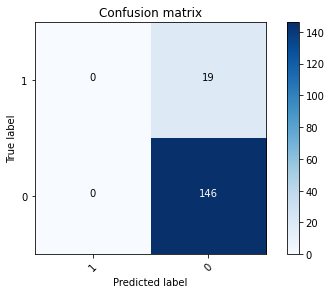

In [391]:
#MULTI-NOMIAL NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:%0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
print("\n\n")
plot_confusion_matrix(cm, classes=['1','0'])


In [394]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("WRITTEN REIVEW WRT OVERALLL ACCURACY IS : {:.2f} ".format(score))
print("\n\n")


WRITTEN REIVEW WRT OVERALLL ACCURACY IS : 0.88 





/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The written reviews are 88% accurate.